# Logistical Regression Classification Model - Medical No Shows

This notebook assesses the feature relevance for Medical no shows in a Logistical Regression Classification Model. Data used for the evaluation was processed after consulting a subject matter expert. The model uses parameters that were hypertuned using gridsearchCV

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import os

### Load and view data

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset_postconsult.csv')
data.head()

,appointment_id,patient_id,repeat_patient_yn,gender_yn,time_between_sch_appt,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,6.790000e+14,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,5.460000e+13,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4.370000e+12,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,5.450000e+13,0,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,6.290000e+13,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### Drop irrelevant columns

In [3]:
clean_data = data.drop(['appointment_id', 'patient_id','time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (93899, 26)


### Assign X (data for modelling) and y (target)

In [4]:
X = clean_data.drop('no_show_yn', axis=1)
y = clean_data['no_show_yn']
print(X.shape, y.shape)

(93899, 25) (93899,)


### Split our data into training and testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Create a Logistic Regression Model

In [6]:
#Use params from gridsearchCV best param results
classifier = LogisticRegression(penalty='l2',C = 0.01, random_state=0)

classifier

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Fit (train) model using the training data

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Validate the model using the test data

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8147506531864137
Testing Data Score: 0.8146964856230032


### Make predictions

In [9]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.699653,0.300347
1,0,0,0.831294,0.168706
2,0,0,0.950659,0.049341
3,0,0,0.727950,0.272050
4,0,0,0.930948,0.069052
5,0,0,0.941077,0.058923
6,0,0,0.711412,0.288588
7,0,0,0.942999,0.057001
8,0,0,0.955278,0.044722
9,0,0,0.748889,0.251111


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[19125,     0],
       [ 4350,     0]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 19125   False Pos: 0
False Neg: 4350  True Pos: 0


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

Text(0.5, 1.0, 'Post Consult w/ Tuning Confusion Matrix')

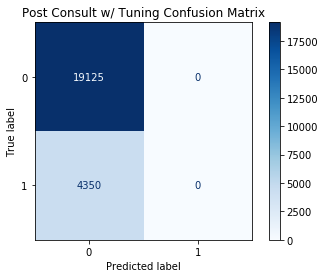

In [13]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')
plt.title('Post Consult w/ Tuning Confusion Matrix')

In [14]:
# evaluate the model using model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test,predictions))

Accuracy: 0.8146964856230032
Precision: 0.0
Recall: 0.0
Matthews Correlation Coefficient: 0.0


/Users/kasiewong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kasiewong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### ROC Curve

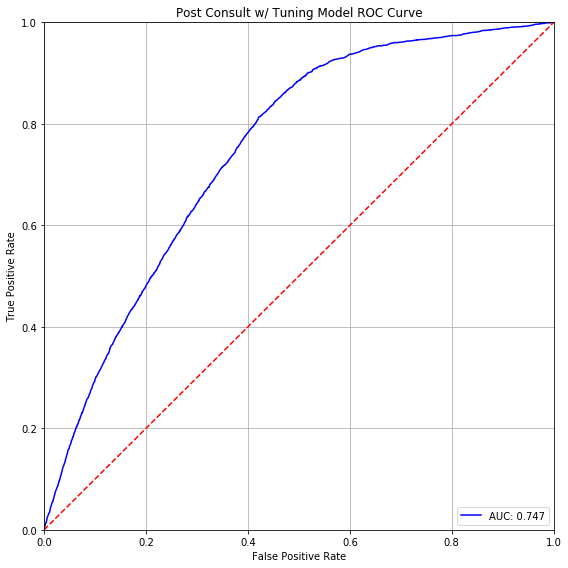

In [15]:
plt.figure(figsize=(8,8))
predictions_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.title('Post Consult w/ Tuning Model ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.tight_layout()

plt.savefig('ROC_LR.png')

plt.show()


### Find Coefficients of Attributes
Which attributes are most strongly correlated with being a noshow? The more positive the coefficient, the more likely of being a noshow, whereas the more negative the coefficient, the less likely to be a noshow.

In [16]:
attribute_coef = sorted(zip(classifier.coef_[0], X.columns), reverse=True)
attribute_coef

[(0.902889445698717, 'advanced_appt_yn'),
 (0.4836865836619677, 'within_week_appt_yn'),
 (0.23453215814501768, 'young_adult_yn'),
 (0.1852996244916472, 'welfare_assistance'),
 (0.1823604600599189, 'child_yn'),
 (0.17729798107206052, 'repeat_patient_yn'),
 (0.16736890375081429, 'alcoholism'),
 (0.10647474350508868, 'gender_yn'),
 (0.09158242744351629, 'diabetes'),
 (0.08673881993402321, 'handicap_yn'),
 (0.046444760704794585, 'neighborhood_income_lower_yn'),
 (0.041848524349441064, 'monday_yn'),
 (0.036827948316207004, 'tuesday_yn'),
 (0.02985092714455836, 'friday_yn'),
 (0.00183551497054022, 'saturday_yn'),
 (-0.01350953187201585, 'day_after_holiday_yn'),
 (-0.023082875305466877, 'neigborhood_income_higher_yn'),
 (-0.02395938016138268, 'neighborhood_income_middle_yn'),
 (-0.03693919699988797, 'hypertension'),
 (-0.03767391440142409, 'wednesday_yn'),
 (-0.056228359591270836, 'adult_yn'),
 (-0.073286495141377, 'thursday_yn'),
 (-0.24507819532677855, 'sms_received'),
 (-0.361261753375719,

In [17]:
LRattribute_coef_df = pd.DataFrame(attribute_coef, columns=['coefficients','attributes'])
LRattribute_coef_df = LRattribute_coef_df.sort_values(by='coefficients', ascending=False)
LRattribute_coef_df

,coefficients,attributes
0,0.902889,advanced_appt_yn
1,0.483687,within_week_appt_yn
2,0.234532,young_adult_yn
3,0.185300,welfare_assistance
4,0.182360,child_yn
5,0.177298,repeat_patient_yn
6,0.167369,alcoholism
7,0.106475,gender_yn
8,0.091582,diabetes
9,0.086739,handicap_yn


In [18]:
#Export to csv 
LRattribute_coef_df.to_csv('../data/cleanData/modelResults/LRattribute_coef_postconsult.csv', index = False, header=True)

### Rank Attribute Importance
Rank the attributes is most to least important

In [19]:
LRattribute_importance_df = LRattribute_coef_df.reindex(LRattribute_coef_df.coefficients.abs()
                                                        .sort_values(ascending=False).index)

LRattribute_importance_df

,coefficients,attributes
24,-1.387174,same_day_appt_yn
0,0.902889,advanced_appt_yn
1,0.483687,within_week_appt_yn
23,-0.361262,senior_yn
22,-0.245078,sms_received
2,0.234532,young_adult_yn
3,0.185300,welfare_assistance
4,0.182360,child_yn
5,0.177298,repeat_patient_yn
6,0.167369,alcoholism


In [20]:
LRattribute_importance_df=LRattribute_importance_df.set_index('attributes')

LRattribute_importance_df

,coefficients
attributes,
same_day_appt_yn,-1.387174
advanced_appt_yn,0.902889
within_week_appt_yn,0.483687
senior_yn,-0.361262
sms_received,-0.245078
young_adult_yn,0.234532
welfare_assistance,0.185300
child_yn,0.182360
repeat_patient_yn,0.177298


### Plot Attribute Coefficients

<Figure size 432x288 with 0 Axes>

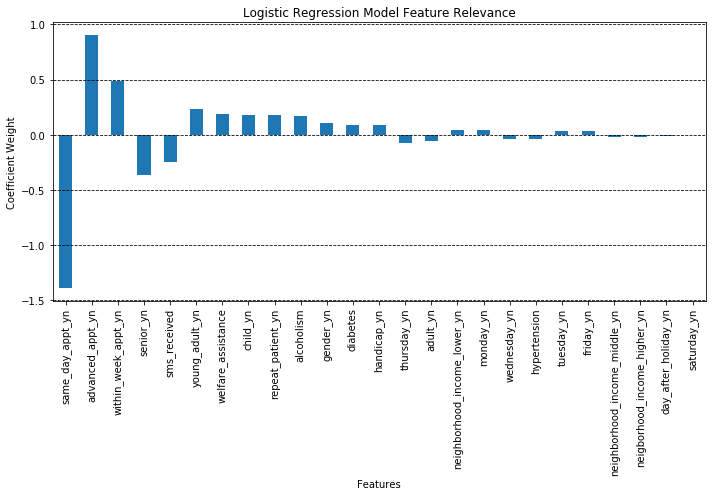

In [21]:
plt.figure()
LRattribute_importance_df.plot(kind="bar", legend=False, figsize=(10, 7))
plt.title("Logistic Regression Model Feature Relevance")
plt.ylabel("Coefficient Weight")
plt.xlabel("Features")

plt.grid(axis="y", color="k", linestyle="--")
plt.tight_layout()
plt.savefig("feature_relevance_LR.png")

plt.show()